**Importing Libraries**

In [65]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from tkinter import *
root = Tk()

In [67]:
df = pd.read_csv('dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df.drop(['Symptom_8','Symptom_9','Symptom_10','Symptom_11','Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17'],axis=1,inplace=True)

In [69]:
df.shape

(4920, 8)

In [70]:
df.isna().sum()

Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
dtype: int64

In [71]:
# Percentage of Missing Values
(df.isnull().sum()/df.shape[0])*100

Disease       0.000000
Symptom_1     0.000000
Symptom_2     0.000000
Symptom_3     0.000000
Symptom_4     7.073171
Symptom_5    24.512195
Symptom_6    40.365854
Symptom_7    53.902439
dtype: float64

<AxesSubplot:>

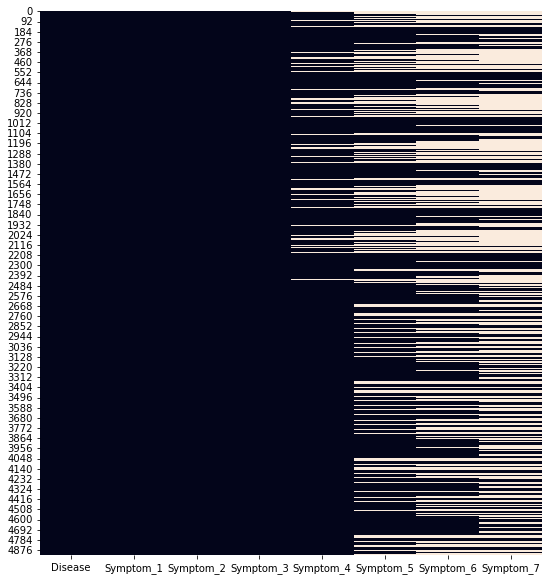

In [72]:
plt.figure(figsize=(9,10))
sns.heatmap(df.isnull(),cbar=False)

In [73]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7'],
      dtype='object')

In [74]:
df.describe().T

,count,unique,top,freq
Disease,4920,41,Fungal infection,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high_fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390
Symptom_7,2268,26,abdominal_pain,264


In [75]:
#Removing Underscore
for col in df.columns:
    df[col]= df[col].str.replace('_',' ')

In [76]:
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN


**Replacing Null Values**

In [77]:
df.fillna(0,inplace=True)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0


In [78]:
df.isna().sum()

Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Symptom_5    0
Symptom_6    0
Symptom_7    0
dtype: int64

In [79]:
df['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

**Importing Symptoms Dataset**

In [80]:
df_s = pd.read_csv('Symptom-severity.csv')
df_s.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [81]:
# Removing underscore
df_s['Symptom']=df_s['Symptom'].str.replace('_',' ')

In [82]:
df_s['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [83]:
a= np.array(df_s['weight'])
a

array([1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2,
       6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4,
       6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4,
       4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4,
       3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3,
       3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3,
       5], dtype=int64)

**Encoding Symptoms**

In [84]:
vals = df.values
vals

array([['Fungal infection', 'itching', 'skin rash', ..., 0, 0, 0],
       ['Fungal infection', 'skin rash', 'nodal skin eruptions', ..., 0,
        0, 0],
       ['Fungal infection', 'itching', 'nodal skin eruptions', ..., 0, 0,
        0],
       ...,
       ['Urinary tract infection', 'burning micturition',
        'bladder discomfort', ..., 0, 0, 0],
       ['Psoriasis', 'skin rash', 'joint pain', ...,
        'small dents in nails', 'inflammatory nails', 0],
       ['Impetigo', 'skin rash', 'high fever', ..., 'yellow crust ooze',
        0, 0]], dtype=object)

In [85]:

symptoms = df_s['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_s[df_s['Symptom'] == symptoms[i]]['weight'].values[0]
    
newdf = pd.DataFrame(vals, columns=cols)
newdf.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,dischromic patches,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0


In [86]:
df_s['Symptom'].value_counts()

fluid overload          2
itching                 1
spinning movements      1
muscle pain             1
irritability            1
                       ..
constipation            1
back pain               1
pain behind the eyes    1
loss of appetite        1
prognosis               1
Name: Symptom, Length: 132, dtype: int64

**No Symptoms assiging zero**

In [87]:
newdf = newdf.replace('dischromic  patches', 0)
newdf = newdf.replace('spotting  urination',0)
newdf = newdf.replace('foul smell of urine',0)
newdf.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0
5,Fungal infection,3,4,0,0,0,0,0
6,Fungal infection,1,4,0,0,0,0,0
7,Fungal infection,1,3,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0
9,Fungal infection,1,3,4,0,0,0,0


**Selection of features for Training Purpose**

In [88]:
X = newdf.drop(['Disease'],axis=1)
y = newdf['Disease']

In [89]:
X.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,1,3,4,0,0,0,0
1,3,4,0,0,0,0,0
2,1,4,0,0,0,0,0
3,1,3,0,0,0,0,0
4,1,3,4,0,0,0,0


In [90]:
y.sample(10)

4236    Paralysis (brain hemorrhage)
642                      Hepatitis E
4153            Cervical spondylosis
3063                    Heart attack
566                          Malaria
3965                    Heart attack
3290                    Hypertension
2926                         Malaria
1331                    Hypertension
3151                       Arthritis
Name: Disease, dtype: object

**Splitting the dataset**

In [91]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
from sklearn.svm import SVC

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=0)

In [93]:
clf_svc= SVC()
clf_svc.fit(X_train,y_train)

SVC()

In [94]:
predict = clf_svc.predict(X_test)

In [95]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,predict)*100,2)))

Accuracy Score: 95.43%


In [96]:
print(classification_report(y_test,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       0.92      1.00      0.96        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       0.92      0.92      0.92        24
                                Allergy       0.83      1.00      0.91        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      0.96      0.98        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      0.88      0.93        24
                            Common Cold       1.00      0.88      0.93        24
                           

<AxesSubplot:>

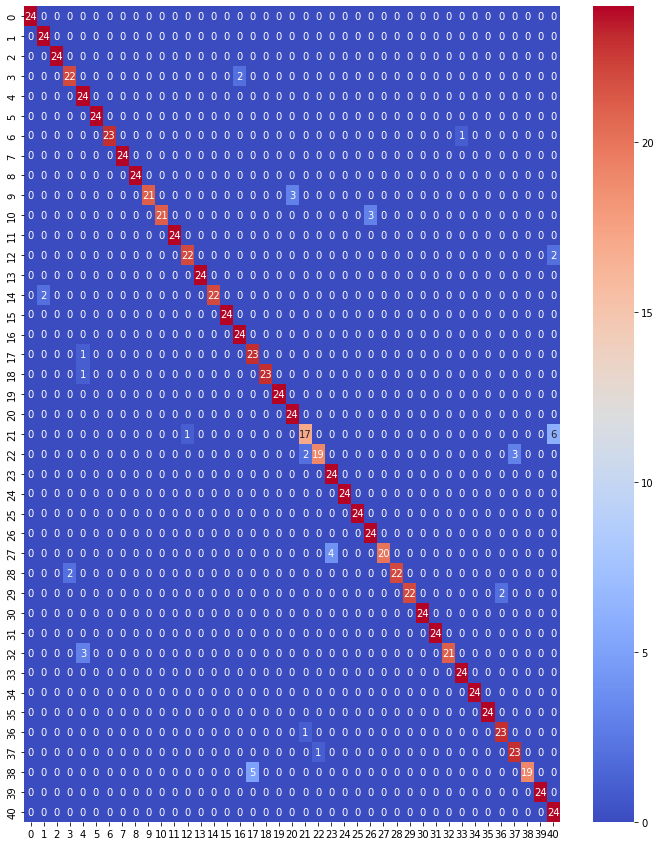

In [97]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,cbar=True,cmap='coolwarm')

**Random Forest Classifier**

In [98]:

l1=['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressure',
       'runny nose', 'congestion', 'chest pain', 'weakness in limbs',
       'fast heart rate', 'pain during bowel movements',
       'pain in anal region', 'bloody stool', 'irritation in anus',
       'neck pain', 'dizziness', 'cramps', 'bruising', 'obesity',
       'swollen legs', 'swollen blood vessels', 'puffy face and eyes',
       'enlarged thyroid', 'brittle nails', 'swollen extremeties',
       'excessive hunger', 'extra marital contacts',
       'drying and tingling lips', 'slurred speech', 'knee pain',
       'hip joint pain', 'muscle weakness', 'stiff neck',
       'swelling joints', 'movement stiffness', 'spinning movements',
       'loss of balance', 'unsteadiness', 'weakness of one body side',
       'loss of smell', 'bladder discomfort', 'foul smell ofurine',
       'continuous feel of urine', 'passage of gases', 'internal itching',
       'toxic look (typhos)', 'depression', 'irritability', 'muscle pain',
       'altered sensorium', 'red spots over body', 'belly pain',
       'abnormal menstruation', 'dischromic patches',
       'watering from eyes', 'increased appetite', 'polyuria',
       'family history', 'mucoid sputum', 'rusty sputum',
       'lack of concentration', 'visual disturbances',
       'receiving blood transfusion', 'receiving unsterile injections',
       'coma', 'stomach bleeding', 'distention of abdomen',
       'history of alcohol consumption', 'blood in sputum',
       'prominent veins on calf', 'palpitations', 'painful walking',
       'pus filled pimples', 'blackheads', 'scurring', 'skin peeling',
       'silver like dusting', 'small dents in nails',
       'inflammatory nails', 'blister', 'red sore around nose',
       'yellow crust ooze', 'prognosis']

pred1=StringVar()
pred2=StringVar()


def randomforest():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.ensemble import RandomForestClassifier
        clf4 = RandomForestClassifier(n_estimators=700,random_state=0,n_jobs=-1,verbose=4)
        clf4 = clf4.fit(X_train,y_train)

        # calculating accuracy 
        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf4.predict(X_test)
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)
        print(classification_report(y_test,y_pred))
    
        [s1,s2,s3,s4,s5] = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
        print(s1)
        def predict(s1,s2,s3,s4='vomiting',s5='vomiting',s6='vomiting',s7='vomiting'):
            l = [s1,s2,s3,s4,s5,s6,s7]
            print(l)

            x= np.array(df_s['Symptom'])
            y= np.array(df_s['weight'])
            for i in range(len(l)):
                for j in range(len(x)):
                    if l[i]==x[j]:
                        l[i]=y[j]
            res = [l]
            pred = clf4.predict(res)
            print(pred[0])
            pred2.set(" ")
            pred2.set(pred[0])
        predict(s1,s2,s3,s4,s5)


In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
clf_rfc = RandomForestClassifier(n_estimators=700,random_state=0,n_jobs=-1,verbose=4)
clf_rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.1s


building tree 1 of 700
building tree 2 of 700building tree 3 of 700

building tree 4 of 700
building tree 5 of 700building tree 6 of 700building tree 7 of 700


building tree 8 of 700
building tree 9 of 700building tree 10 of 700building tree 11 of 700

building tree 12 of 700building tree 13 of 700


building tree 14 of 700building tree 15 of 700
building tree 16 of 700

building tree 17 of 700
building tree 18 of 700
building tree 19 of 700
building tree 20 of 700building tree 21 of 700building tree 22 of 700


building tree 23 of 700
building tree 24 of 700
building tree 25 of 700
building tree 26 of 700building tree 27 of 700building tree 28 of 700
building tree 29 of 700

building tree 30 of 700building tree 31 of 700


building tree 32 of 700
building tree 33 of 700building tree 34 of 700

building tree 35 of 700building tree 36 of 700building tree 37 of 700

building tree 38 of 700
building tree 39 of 700

building tree 40 of 700
building tree 41 of 700
building tree 42 of 700bu

[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.3s


building tree 225 of 700
building tree 226 of 700building tree 227 of 700
building tree 228 of 700building tree 229 of 700


building tree 230 of 700building tree 231 of 700

building tree 232 of 700
building tree 233 of 700building tree 234 of 700building tree 235 of 700building tree 236 of 700

building tree 237 of 700


building tree 238 of 700building tree 239 of 700building tree 240 of 700


building tree 241 of 700
building tree 242 of 700building tree 243 of 700building tree 244 of 700building tree 245 of 700

building tree 246 of 700building tree 247 of 700



building tree 248 of 700
building tree 249 of 700building tree 250 of 700building tree 251 of 700building tree 252 of 700


building tree 253 of 700building tree 254 of 700
building tree 255 of 700

building tree 256 of 700

building tree 257 of 700building tree 258 of 700

building tree 259 of 700building tree 260 of 700building tree 261 of 700building tree 262 of 700building tree 263 of 700


building tree 264 of 700




[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.6s


building tree 444 of 700

building tree 445 of 700building tree 446 of 700building tree 447 of 700
building tree 448 of 700


building tree 449 of 700
building tree 450 of 700
building tree 451 of 700building tree 452 of 700
building tree 453 of 700building tree 454 of 700building tree 455 of 700
building tree 456 of 700



building tree 457 of 700building tree 458 of 700

building tree 459 of 700building tree 460 of 700building tree 461 of 700

building tree 462 of 700
building tree 463 of 700building tree 464 of 700


building tree 465 of 700
building tree 466 of 700building tree 467 of 700building tree 468 of 700

building tree 469 of 700

building tree 470 of 700
building tree 471 of 700
building tree 472 of 700
building tree 473 of 700building tree 474 of 700
building tree 475 of 700building tree 476 of 700
building tree 477 of 700


building tree 478 of 700
building tree 479 of 700
building tree 480 of 700
building tree 481 of 700building tree 482 of 700building tree 483 of 700



[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    1.1s finished


RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=0, verbose=4)

In [101]:
predict = clf_rfc.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.1s finished


In [102]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,predict)*100,2)))

Accuracy Score: 98.48%


In [103]:
print(classification_report(y_test,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       0.86      1.00      0.92        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.00        24
                           

<AxesSubplot:>

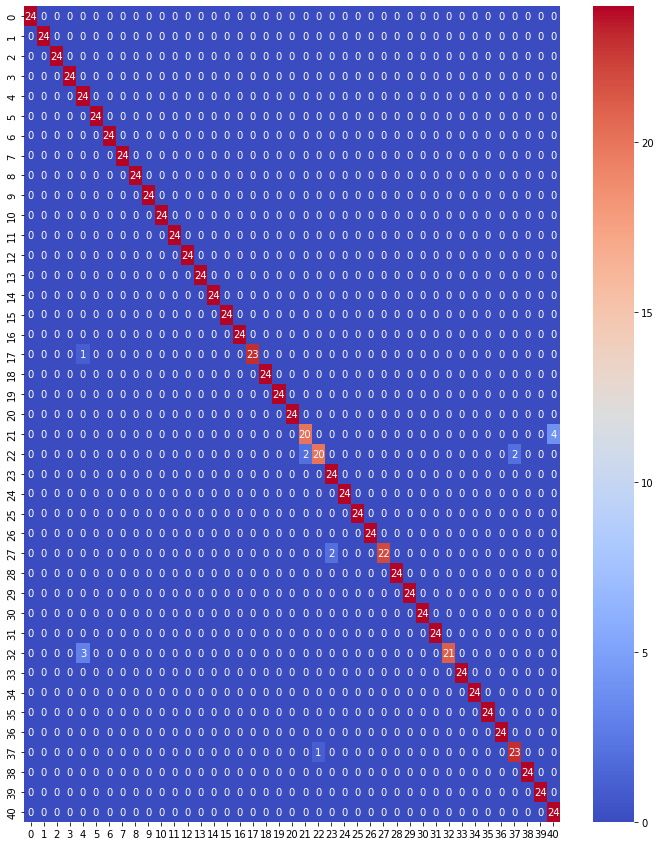

In [104]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,cbar=True,cmap='coolwarm')

**Decision Tree**

In [105]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 


In [106]:
clf_dct = tree.DecisionTreeClassifier()
clf_dct.fit(X_train,y_train)

DecisionTreeClassifier()

In [107]:
abc = clf_dct.predict(X_test)

In [108]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,abc)*100,2)))

Accuracy Score: 98.48%


In [109]:
print(classification_report(y_test,abc))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       0.86      1.00      0.92        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.00        24
                           

<AxesSubplot:>

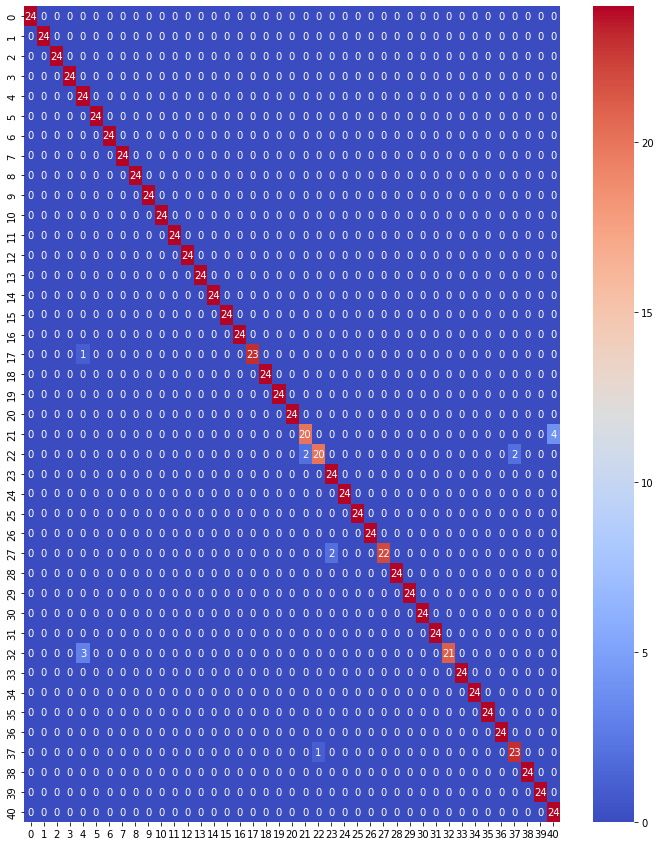

In [110]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,abc),annot=True,cbar=True,cmap='coolwarm')

**Naive Bayes**

In [111]:
from sklearn.naive_bayes import GaussianNB

In [112]:
clf_nb = GaussianNB()
clf_nb.fit(X_train,y_train)

GaussianNB()

In [113]:
xyz = clf_nb.predict(X_test)

In [114]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,xyz)*100,2)))

Accuracy Score: 80.89%


In [115]:
print(classification_report(y_test,xyz))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.55      0.96      0.70        24
                                   AIDS       0.63      0.92      0.75        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       0.50      0.08      0.14        24
                                Allergy       1.00      0.92      0.96        24
                              Arthritis       1.00      0.92      0.96        24
                       Bronchial Asthma       1.00      0.79      0.88        24
                   Cervical spondylosis       0.68      0.79      0.73        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       0.49      0.88      0.63        24
                            Common Cold       0.58      0.92      0.71        24
                           

<AxesSubplot:>

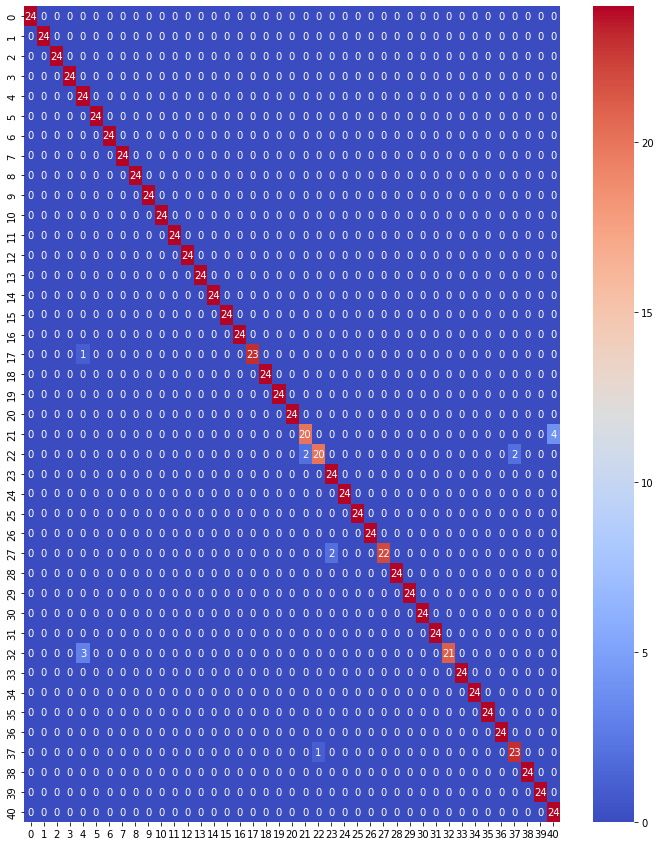

In [116]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,abc),annot=True,cbar=True,cmap='coolwarm')

**GUI Implementation**

In [117]:

root.configure(background='Ivory')
root.title('Disease Predictor System')
root.resizable(0,0)

''

In [118]:
Symptom1 = StringVar()
Symptom1.set("Select Here")

Symptom2 = StringVar()
Symptom2.set("Select Here")

Symptom3 = StringVar()
Symptom3.set("Select Here")

Symptom4 = StringVar()
Symptom4.set("Select Here")

Symptom5 = StringVar()
Symptom5.set("Select Here")
Name = StringVar()

In [119]:
prev_win=None
def Reset():
    global prev_win

    Symptom1.set("Select Here")
    Symptom2.set("Select Here")
    Symptom3.set("Select Here")
    Symptom4.set("Select Here")
    Symptom5.set("Select Here")
    NameEn.delete(first=0,last=100)
    pred1.set(" ")
    pred2.set(" ")
    
    try:
        prev_win.destroy()
        prev_win=None
    except AttributeError:
        pass

In [120]:
from tkinter import messagebox
def Exit():
    qExit=messagebox.askyesno("System","Do you want to exit the system")
    
    if qExit:
        root.destroy()
        exit()

In [121]:
#Headings for the GUI written at the top of GUI
w2 = Label(root, justify=LEFT, text="Disease Prediction using Machine Learning", fg="Red", bg="Ivory")
w2.config(font=("Times",30,"bold italic"))
w2.grid(row=1, column=0, columnspan=2, padx=100)
w2 = Label(root, justify=LEFT, text="Project Exhibition II", fg="Pink", bg="Ivory")
w2.config(font=("Times",30,"bold italic"))
w2.grid(row=2, column=0, columnspan=2, padx=100)

In [122]:
#Label for the name
NameLb = Label(root, text="Name of the Patient *", fg="Red", bg="Ivory")
NameLb.config(font=("Times",15,"bold italic"))
NameLb.grid(row=6, column=0, pady=15, sticky=W)

In [123]:
#Creating Labels for the symtoms
S1Lb = Label(root, text="Symptom 1 *", fg="Black", bg="Ivory")
S1Lb.config(font=("Times",15,"bold italic"))
S1Lb.grid(row=7, column=0, pady=10, sticky=W)

S2Lb = Label(root, text="Symptom 2 *", fg="Black", bg="Ivory")
S2Lb.config(font=("Times",15,"bold italic"))
S2Lb.grid(row=8, column=0, pady=10, sticky=W)

S3Lb = Label(root, text="Symptom 3", fg="Black",bg="Ivory")
S3Lb.config(font=("Times",15,"bold italic"))
S3Lb.grid(row=9, column=0, pady=10, sticky=W)

S4Lb = Label(root, text="Symptom 4", fg="Black", bg="Ivory")
S4Lb.config(font=("Times",15,"bold italic"))
S4Lb.grid(row=10, column=0, pady=10, sticky=W)

S5Lb = Label(root, text="Symptom 5", fg="Black", bg="Ivory")
S5Lb.config(font=("Times",15,"bold italic"))
S5Lb.grid(row=11, column=0, pady=10, sticky=W)

In [124]:
#Label for the Random Forest

destreeLb = Label(root, text="RandomForest", fg="Red", bg="Orange", width = 20)
destreeLb.config(font=("Times",15,"bold italic"))
destreeLb.grid(row=17, column=0, pady=10, sticky=W)

OPTIONS = sorted(l1)

In [125]:
#Taking name as input from user
NameEn = Entry(root, textvariable=Name)
NameEn.grid(row=6, column=1)

#Taking Symptoms as input from the dropdown from the user
S1 = OptionMenu(root, Symptom1,*OPTIONS)
S1.grid(row=7, column=1)

S2 = OptionMenu(root, Symptom2,*OPTIONS)
S2.grid(row=8, column=1)

S3 = OptionMenu(root, Symptom3,*OPTIONS)
S3.grid(row=9, column=1)

S4 = OptionMenu(root, Symptom4,*OPTIONS)
S4.grid(row=10, column=1)

S5 = OptionMenu(root, Symptom5,*OPTIONS)
S5.grid(row=11, column=1)

In [126]:
dst = Button(root, text="PREDICT",command=randomforest,bg="Red",fg="black")
dst.config(font=("Times",15,"bold italic"))
dst.grid(row=6, column=3,padx=10)

rs = Button(root,text="Reset Inputs", command=Reset,bg="yellow",fg="purple",width=15)
rs.config(font=("Times",15,"bold italic"))
rs.grid(row=10,column=3,padx=10)

ex = Button(root,text="Exit System", command=Exit,bg="yellow",fg="purple",width=15)
ex.config(font=("Times",15,"bold italic"))
ex.grid(row=11,column=3,padx=10)

In [127]:

t2=Label(root,font=("Times",15,"bold italic"),text="Random Forest",height=1,bg="black"
         ,width=40,fg="white",textvariable=pred2,relief="sunken").grid(row=17, column=1, padx=10)


In [ ]:
root.mainloop()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


building tree 1 of 700building tree 2 of 700building tree 3 of 700

building tree 4 of 700

building tree 5 of 700building tree 6 of 700
building tree 7 of 700

building tree 8 of 700
building tree 9 of 700building tree 10 of 700
building tree 11 of 700
building tree 12 of 700

building tree 13 of 700building tree 14 of 700building tree 15 of 700


building tree 16 of 700
building tree 17 of 700building tree 18 of 700
building tree 19 of 700
building tree 20 of 700building tree 21 of 700

building tree 22 of 700
building tree 23 of 700building tree 24 of 700


building tree 25 of 700building tree 26 of 700
building tree 27 of 700building tree 28 of 700building tree 29 of 700


building tree 30 of 700

building tree 31 of 700
building tree 32 of 700
building tree 33 of 700building tree 34 of 700building tree 35 of 700

building tree 36 of 700

building tree 37 of 700building tree 38 of 700building tree 39 of 700


building tree 40 of 700
building tree 41 of 700
building tree 42 of 700bu

[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.1s


building tree 146 of 700building tree 147 of 700
building tree 148 of 700
building tree 149 of 700

building tree 150 of 700building tree 151 of 700

building tree 152 of 700
building tree 153 of 700
building tree 154 of 700
building tree 155 of 700building tree 156 of 700building tree 157 of 700
building tree 158 of 700
building tree 159 of 700

building tree 160 of 700

building tree 161 of 700
building tree 162 of 700building tree 163 of 700building tree 164 of 700building tree 165 of 700



building tree 166 of 700
building tree 167 of 700building tree 168 of 700

building tree 169 of 700
building tree 170 of 700building tree 171 of 700building tree 172 of 700


building tree 173 of 700
building tree 174 of 700
building tree 175 of 700
building tree 176 of 700
building tree 177 of 700
building tree 178 of 700building tree 179 of 700
building tree 180 of 700building tree 181 of 700

building tree 182 of 700
building tree 183 of 700

building tree 184 of 700
building tree 185 of 700


[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.5s


building tree 278 of 700

building tree 279 of 700building tree 280 of 700

building tree 281 of 700
building tree 282 of 700building tree 283 of 700building tree 284 of 700

building tree 285 of 700building tree 286 of 700building tree 287 of 700
building tree 288 of 700



building tree 289 of 700
building tree 290 of 700building tree 291 of 700
building tree 292 of 700

building tree 293 of 700building tree 294 of 700building tree 295 of 700building tree 296 of 700



building tree 297 of 700
building tree 298 of 700building tree 299 of 700building tree 300 of 700building tree 301 of 700


building tree 302 of 700building tree 303 of 700
building tree 304 of 700


building tree 305 of 700
building tree 306 of 700
building tree 307 of 700
building tree 308 of 700building tree 309 of 700building tree 310 of 700
building tree 311 of 700

building tree 312 of 700

building tree 313 of 700building tree 314 of 700building tree 315 of 700

building tree 316 of 700building tree 317 of 700



[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.9s


building tree 413 of 700building tree 414 of 700
building tree 415 of 700
building tree 416 of 700

building tree 417 of 700building tree 418 of 700building tree 419 of 700building tree 420 of 700
building tree 421 of 700building tree 422 of 700



building tree 423 of 700

building tree 424 of 700
building tree 425 of 700building tree 426 of 700
building tree 427 of 700
building tree 428 of 700

building tree 429 of 700building tree 430 of 700
building tree 431 of 700building tree 432 of 700


building tree 433 of 700
building tree 434 of 700building tree 435 of 700
building tree 436 of 700

building tree 437 of 700building tree 438 of 700

building tree 439 of 700building tree 440 of 700

building tree 441 of 700
building tree 442 of 700building tree 443 of 700
building tree 444 of 700
building tree 445 of 700

building tree 446 of 700
building tree 447 of 700building tree 448 of 700

building tree 449 of 700building tree 450 of 700

building tree 451 of 700building tree 452 of 700bu

[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:    1.6s


building tree 660 of 700building tree 661 of 700building tree 662 of 700


building tree 663 of 700building tree 664 of 700


building tree 665 of 700
building tree 666 of 700building tree 667 of 700building tree 668 of 700

building tree 669 of 700

building tree 670 of 700
building tree 671 of 700building tree 672 of 700

building tree 673 of 700
building tree 674 of 700
building tree 675 of 700building tree 676 of 700building tree 677 of 700
building tree 678 of 700

building tree 679 of 700
building tree 680 of 700

building tree 681 of 700
building tree 682 of 700building tree 683 of 700
building tree 684 of 700
building tree 685 of 700building tree 686 of 700building tree 687 of 700



building tree 688 of 700
building tree 689 of 700
building tree 690 of 700building tree 691 of 700building tree 692 of 700building tree 693 of 700



building tree 694 of 700
building tree 695 of 700building tree 696 of 700

building tree 697 of 700building tree 698 of 700
building tree 699 of 700b

[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.4s finished


Random Forest
Accuracy
0.9847560975609756
969
Confusion matrix
[[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       0.86      1.00      0.92        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.0s finished
